In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('final_data.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,is_male,weight_pounds,plurality,apgar_5min,mother_age,gestation_weeks,cigarette_use,alcohol_use,weight_gain_pounds,ever_born,father_age,baby_alive
0,0,2005,2,False,5.37,2.0,8.0,29,38.0,False,False,8.0,10.0,31,True
1,1,2005,10,True,6.88,1.0,9.0,30,40.0,False,False,25.0,1.0,50,False
2,2,2005,10,True,6.76,1.0,9.0,19,38.0,False,False,25.0,1.0,24,True
3,3,2005,10,False,8.69,1.0,9.0,27,39.0,False,False,47.0,1.0,30,True
4,4,2005,9,False,7.00,1.0,9.0,20,40.0,False,False,42.0,1.0,30,True


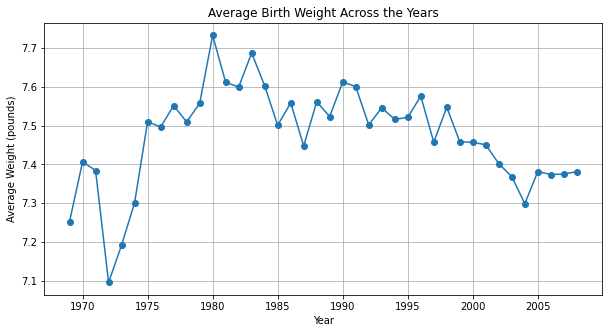

In [8]:
#Average birth weight ('weight_pounds') across the years
average_weight_by_year = df.groupby('year')['weight_pounds'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(average_weight_by_year['year'], average_weight_by_year['weight_pounds'], marker='o')
plt.title('Average Birth Weight Across the Years')
plt.xlabel('Year')
plt.ylabel('Average Weight (pounds)')
plt.grid(True)
plt.show()

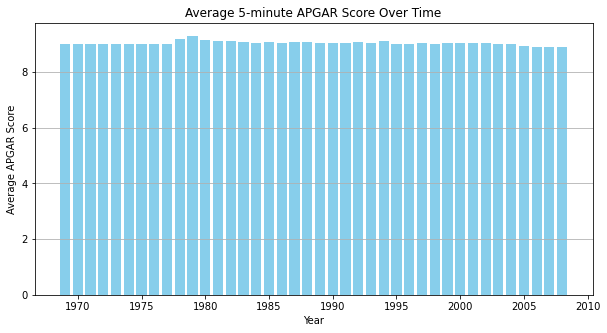

In [9]:
#'apgar_5min change over time

average_apgar_by_year = df.groupby('year')['apgar_5min'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(average_apgar_by_year['year'], average_apgar_by_year['apgar_5min'], color='skyblue')
plt.title('Average 5-minute APGAR Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average APGAR Score')
plt.grid(axis='y')
plt.show()


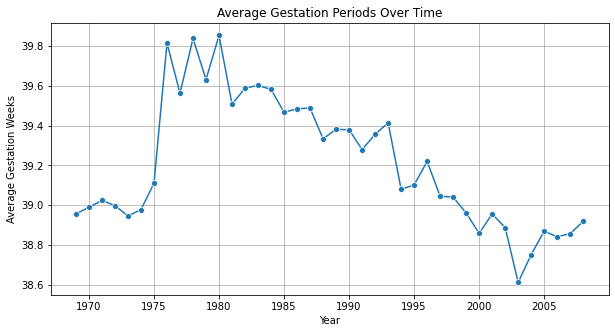

In [12]:
#'gestation_weeks' change over time
import seaborn as sns


average_gestation_by_year = df.groupby('year')['gestation_weeks'].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=average_gestation_by_year, x='year', y='gestation_weeks', marker='o')
plt.title('Average Gestation Periods Over Time')
plt.xlabel('Year')
plt.ylabel('Average Gestation Weeks')
plt.grid(True)
plt.show()

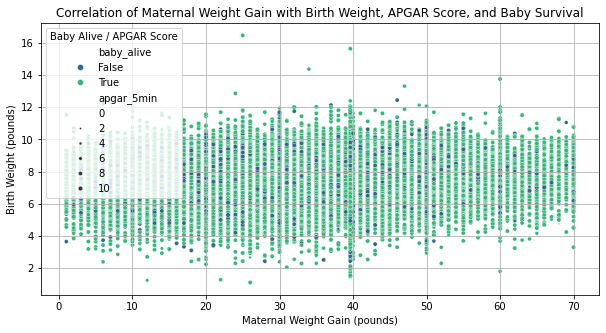

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

df['baby_alive'] = df['baby_alive'].astype('category')

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='weight_gain_pounds', y='weight_pounds', size='apgar_5min', hue='baby_alive', palette='viridis', sizes=(0, 20))
plt.title('Correlation of Maternal Weight Gain with Birth Weight, APGAR Score, and Baby Survival')
plt.xlabel('Maternal Weight Gain (pounds)')
plt.ylabel('Birth Weight (pounds)')
plt.grid(True)
plt.legend(title='Baby Alive / APGAR Score', loc='upper left')
plt.show()


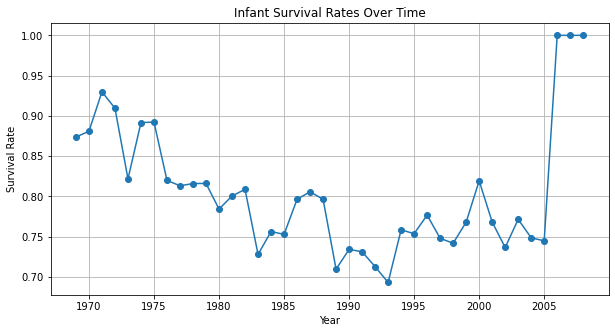

In [22]:
df['baby_alive'] = df['baby_alive'].astype(int)

survival_rate_by_year = df.groupby('year')['baby_alive'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(survival_rate_by_year['year'], survival_rate_by_year['baby_alive'], marker='o')
plt.title('Infant Survival Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

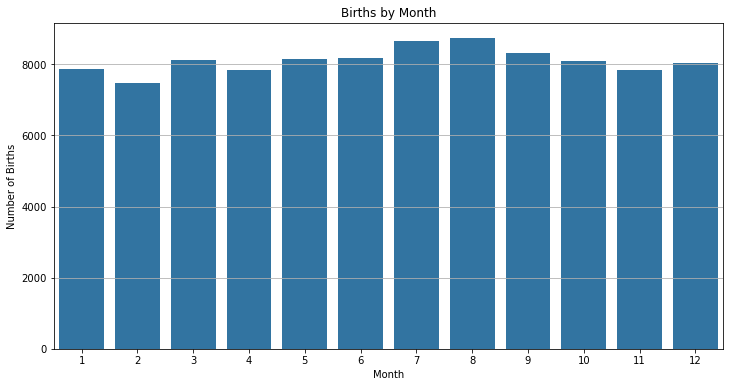

In [24]:
df['month'] = df['month'].astype('category')

births_by_month = df['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=births_by_month.index, y=births_by_month.values)
plt.title('Births by Month')
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.grid(axis='y')
plt.show()


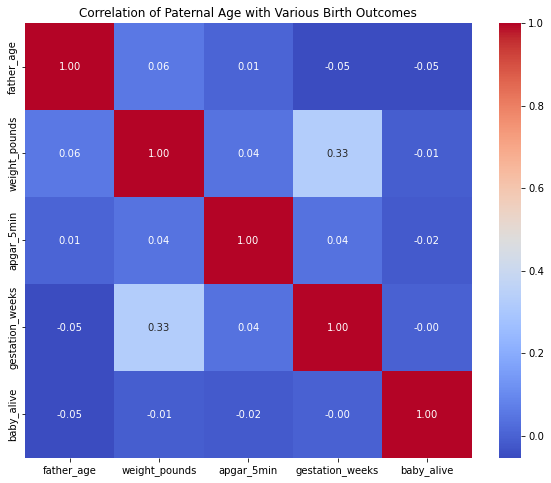

In [25]:
df['baby_alive'] = df['baby_alive'].astype(int)

correlation_matrix = df[['father_age', 'weight_pounds', 'apgar_5min', 'gestation_weeks', 'baby_alive']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Paternal Age with Various Birth Outcomes')
plt.show()